In [158]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [159]:
# importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [160]:
data=pd.read_csv('laptop.csv',encoding='UTF-8')         # importing the dataset using pandas
data.head()                             # shows up first 5 rows of dataset

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [161]:
data.info()     # to know the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [162]:
data=data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)          # droping unnecessary columns
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [163]:
data.shape

(1303, 11)

In [164]:
data.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [165]:
data.dropna(inplace=True)

In [166]:
data.duplicated().sum()

29

In [167]:
data.drop_duplicates()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [168]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')
data['Inches']=data['Inches'].str.replace('?','15.6').astype('float32')


In [169]:
data['Inches'].mode()

0    15.6
Name: Inches, dtype: float32

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float32
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
dtypes: float32(2), float64(1), int32(1), object(7)
memory usage: 104.4+ KB


# Exploratory data analysis

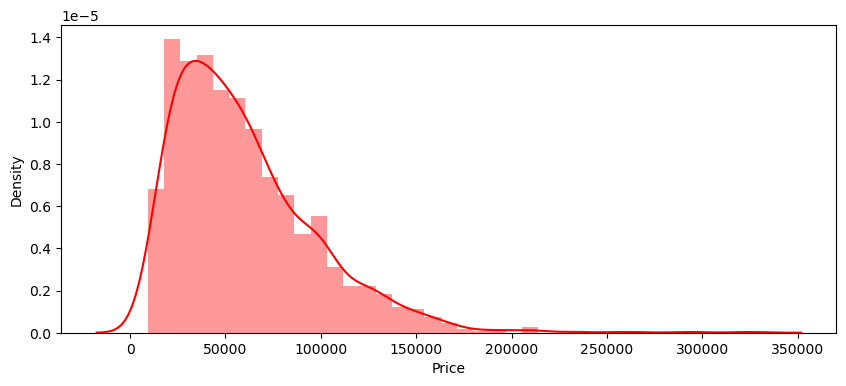

In [171]:
# distribution of target column

plt.figure(figsize=(10,4))
sns.distplot(data['Price'],color='red')
plt.show()

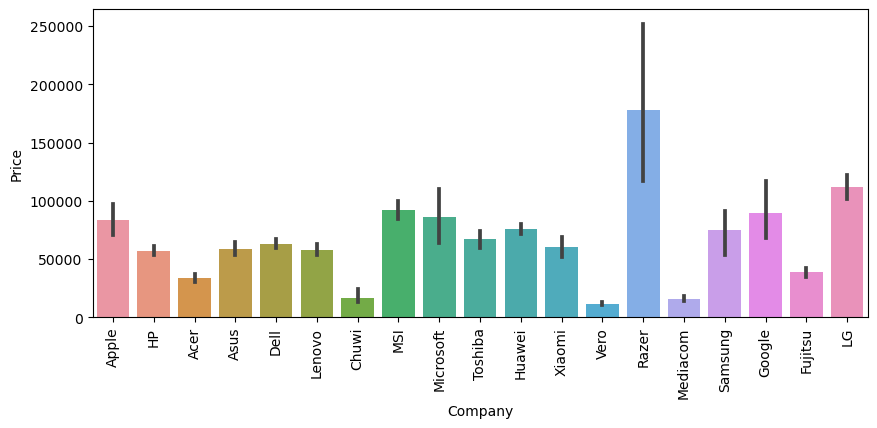

In [172]:
#what is avg price of each brand?
plt.figure(figsize=(10,4))
sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

In [173]:
data['TypeName'].value_counts()


TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

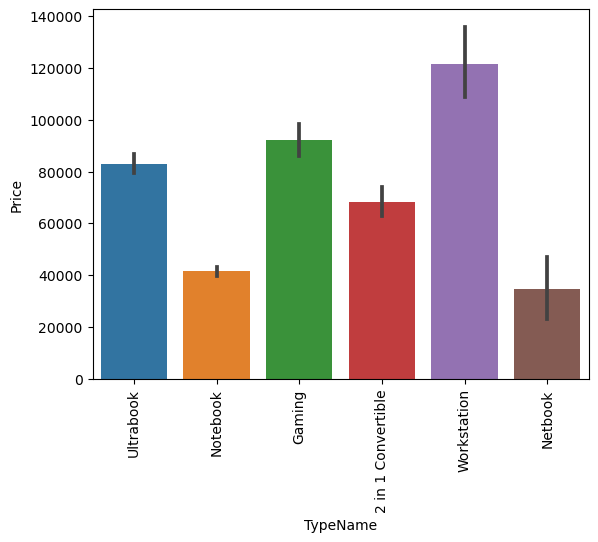

In [174]:
# Type of Laptop
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()


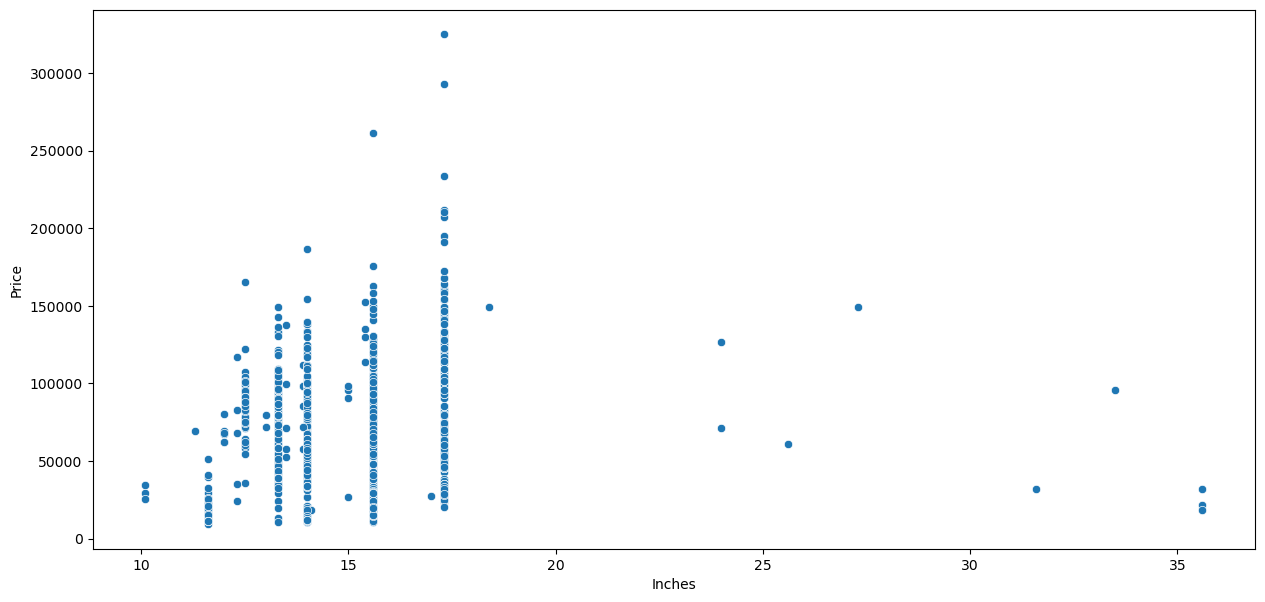

In [175]:
# Price variation for different inches of laptops

plt.figure(figsize=(15,7))
sns.scatterplot(x = data['Inches'],y = data['Price'])
plt.show()


In [176]:
# Screen resolution (Feature engineering)
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

# Creating new column : TouchScreen


In [177]:
data['TouchScreen'] = data['ScreenResolution'].apply(lambda element: 1 if 'Touchscreen' in element else 0)
data.sample(10)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
636,Dell,Ultrabook,13.300000,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,99580.320,1
987,Lenovo,Gaming,15.600000,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.50,63349.920,0
225,Acer,Notebook,15.600000,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.20,44328.960,0
5,Acer,Notebook,15.600000,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.000,0
276,Dell,Notebook,17.299999,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,58554.720,0
475,Dell,Notebook,14.000000,1366x768,Intel Core i3 6100U 2.3GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,1.79,39427.200,0
678,LG,Ultrabook,15.600000,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.09,122490.720,0
1261,Asus,Ultrabook,13.300000,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.120,0
834,Lenovo,Notebook,14.000000,IPS Panel Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,87912.000,0
514,Xiaomi,Notebook,15.600000,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD,Nvidia GeForce MX150,No OS,1.95,74589.336,0


In [178]:
data['TouchScreen'].value_counts()

TouchScreen
0    1088
1     185
Name: count, dtype: int64

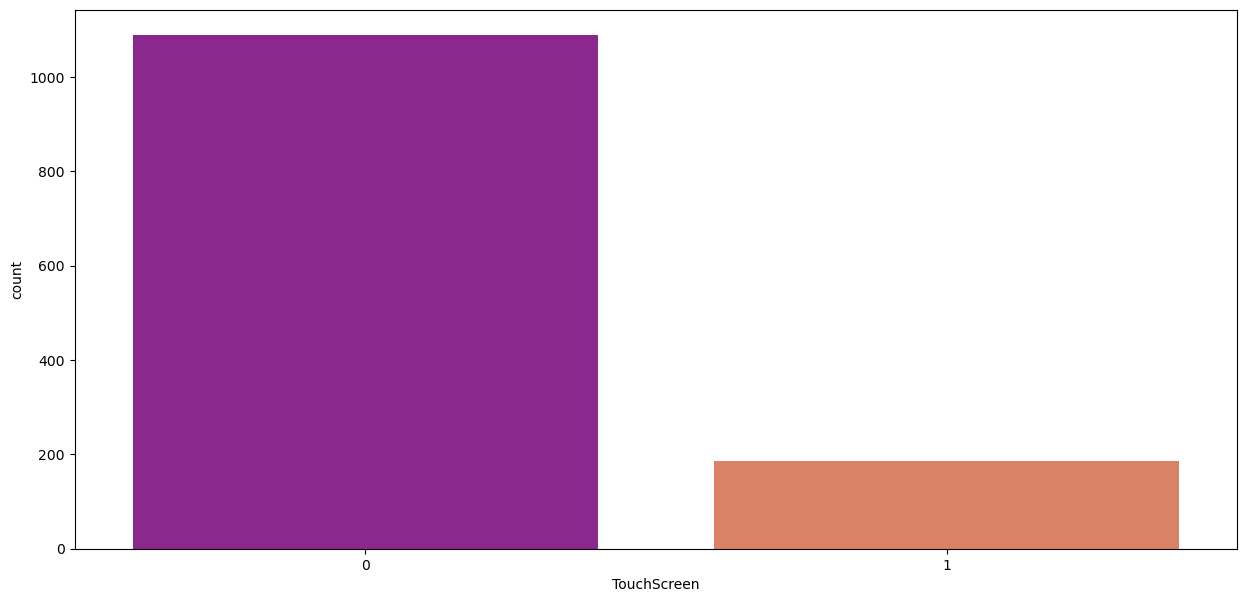

In [179]:
plt.figure(figsize=(15,7))
sns.countplot(x=data['TouchScreen'],palette='plasma')
plt.show()

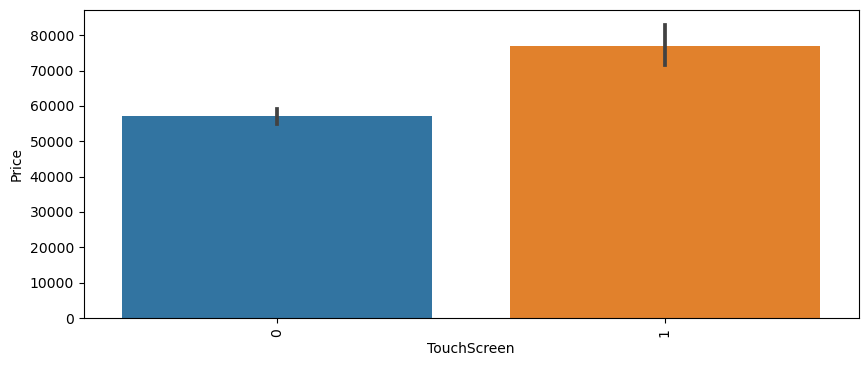

In [180]:
# Price variation on Touch screen laptops

plt.figure(figsize=(10,4))
sns.barplot(x = data['TouchScreen'],y = data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [181]:
#  Creating nuw column : IPS
data['IPS'] = data['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
855,Dell,Notebook,15.600000,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.90,50349.60,0,0
469,Lenovo,Ultrabook,14.000000,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6600U 2.6GHz,12,256GB SSD,Intel HD Graphics 520,Windows 10,1.40,98994.24,0,1
658,Lenovo,Gaming,15.600000,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960,Windows 10,3.31,63722.88,0,1
244,Lenovo,2 in 1 Convertible,13.900000,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489.12,1,1
195,HP,Notebook,17.299999,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.92,0,1


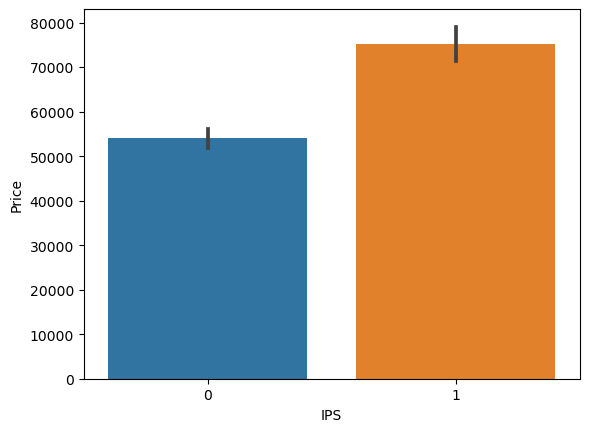

In [182]:

data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['IPS'],y=data['Price'])
plt.show()

In [183]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]

#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))

#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float32
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
 11  TouchScreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  X_res             1273 non-null   int32  
 14  Y_res             1273 non-null   int32  
dtypes: float32(2), float64(1), int32(3), int64(2), object(7)
memory usage: 134.3+ KB


In [185]:
data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.685648
X_res          0.557556
Y_res          0.554069
PPI            0.468636
IPS            0.254851
TouchScreen    0.188994
Weight         0.175877
Inches         0.044966
Name: Price, dtype: float64

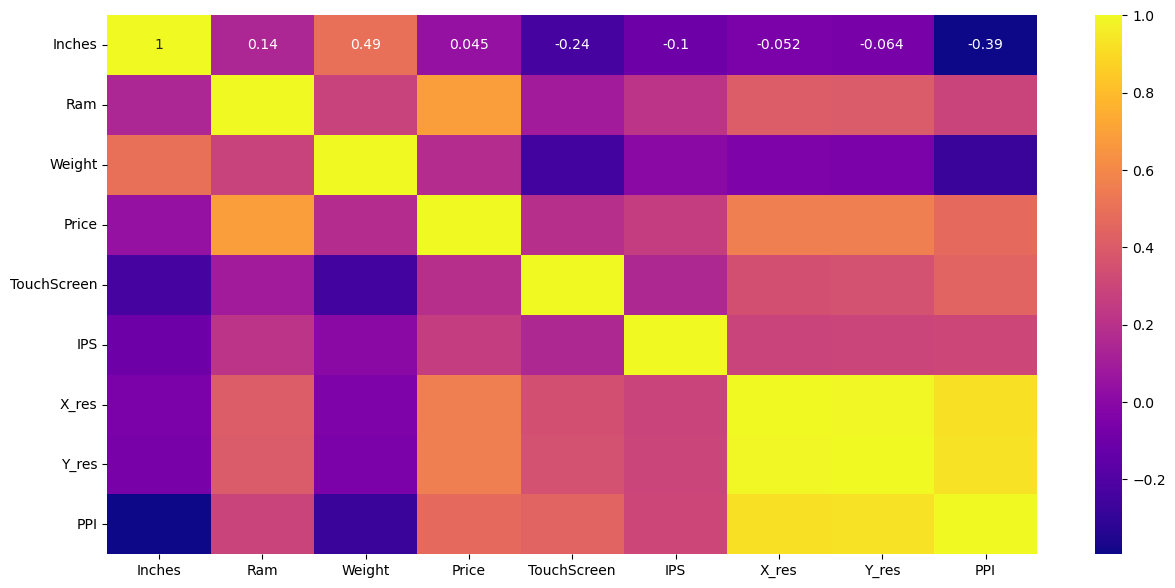

In [186]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='plasma')
plt.show()

In [187]:
data.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001


In [188]:
# CPU Analysis
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [189]:
data['CPU'] = data['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
data['CPU'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'AMD E-Series E2-9000e',
       'Intel Atom x5-Z8300', 'AMD E-Series E2-6110',
       'AMD A6-Series 9220', 'Intel Celeron Dual', 'AMD Ryzen 1700',
       'Intel Pentium Quad', 'AMD FX 9830P', 'AMD E-Series 6110',
       'Intel Xeon E3-1505M', 'AMD E-Series 9000e',
       'AMD A10-Series A10-9620P', 'AMD A6-Series A6-9220',
       'AMD A10-Series 9600P', 'AMD A8-Series 7410',
       'AMD A12-Series 9720P', 'Intel Celeron Quad', 'AMD Ryzen 1600',
       'Intel Atom x5-Z8350', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Intel Atom x5-Z8550',
       'Samsung Cortex A72&A53', 'AMD E-Series 9000',
       'AMD A9-Series 9410'], dtype=object)

In [190]:
def processortype(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    
data['CPU'] = data['CPU'].apply(lambda text:processortype(text))
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5


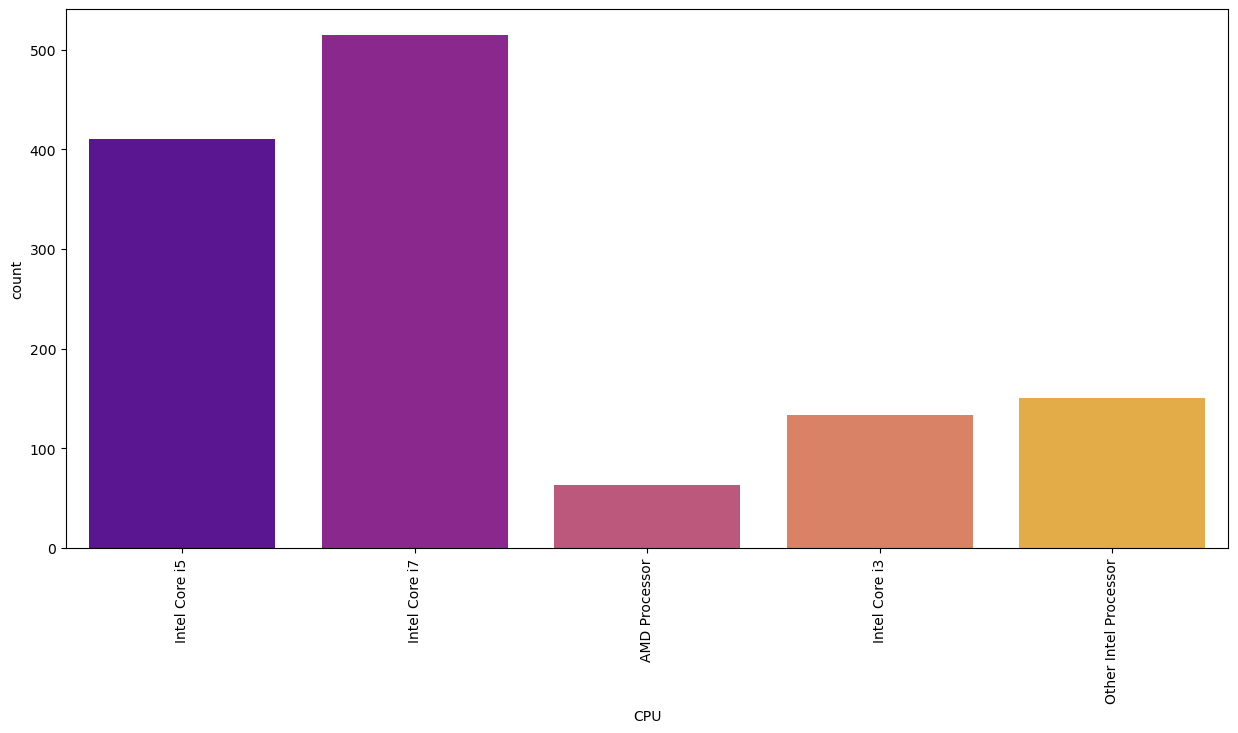

In [191]:
plt.figure(figsize=(15,7))
sns.countplot(x=data['CPU'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()


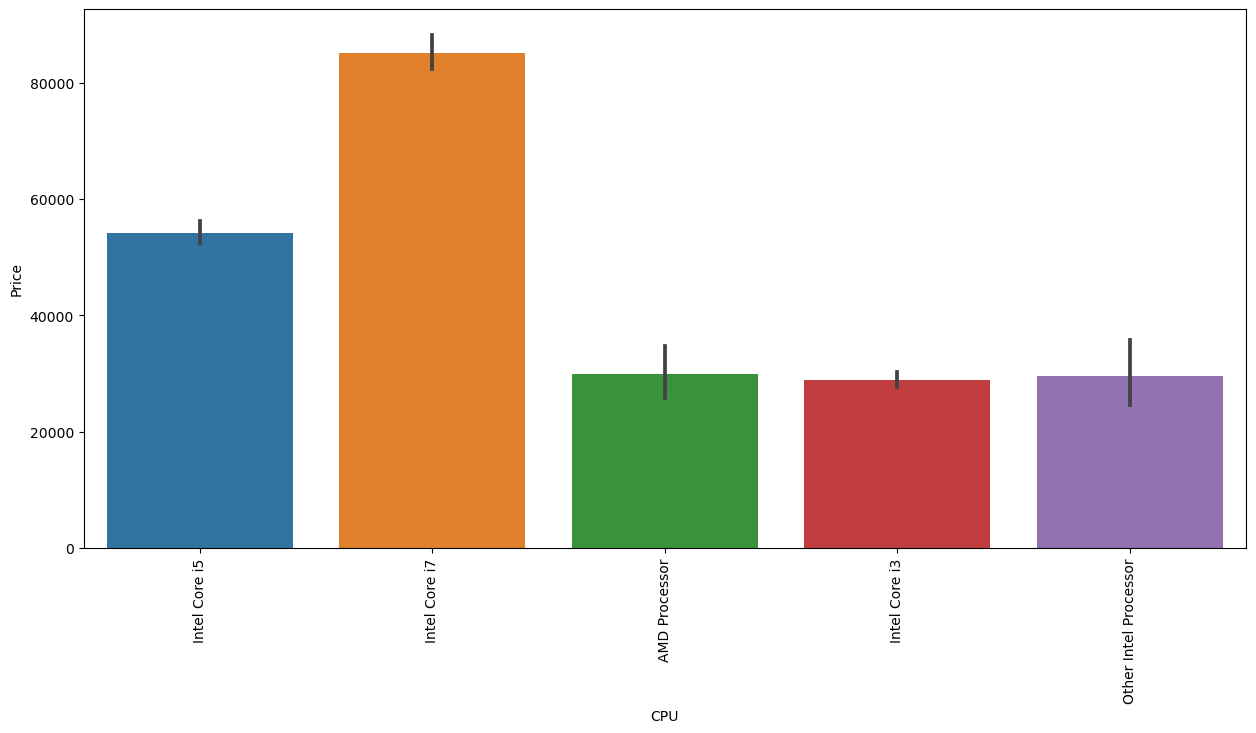

In [192]:
plt.figure(figsize=(15,7))
sns.barplot(x=data['CPU'],y=data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [193]:
data.drop(columns=['Cpu'],inplace=True)


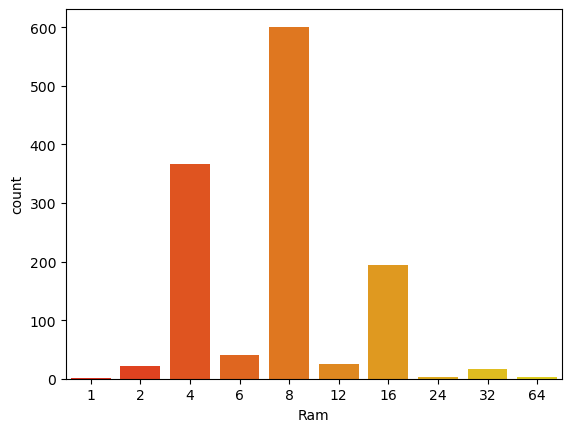

In [194]:
# RAM Analysis
sns.countplot(x=data['Ram'],palette='autumn')
plt.show()

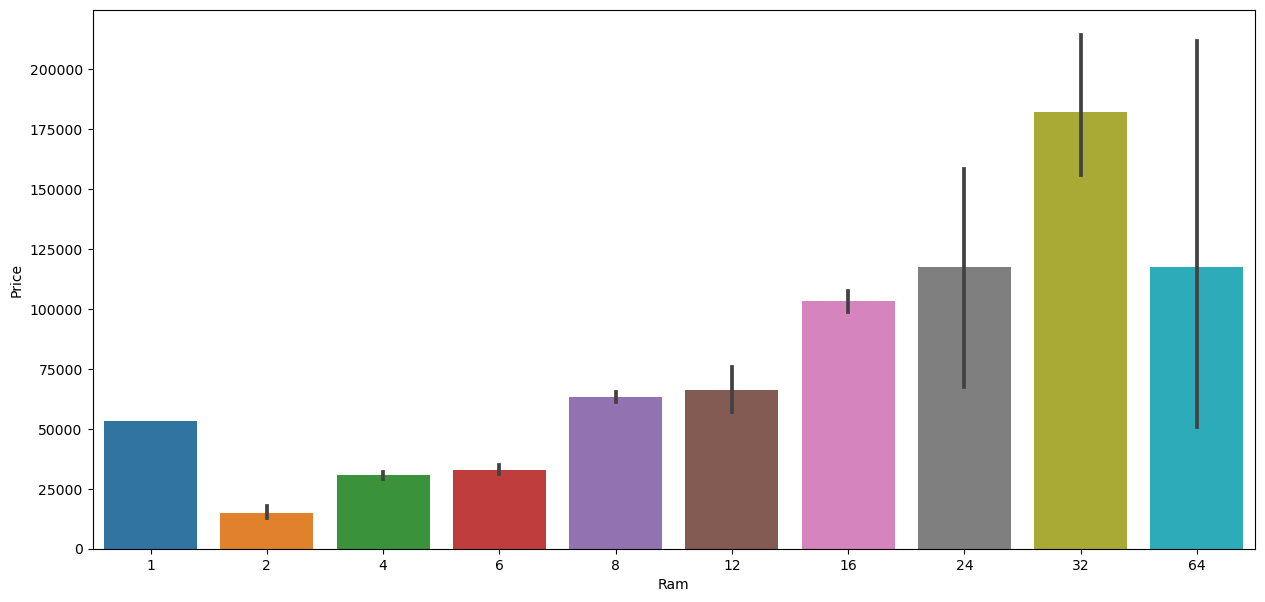

In [195]:
plt.figure(figsize=(15,7))
sns.barplot(x=data['Ram'],y=data['Price'])
plt.show()


In [196]:
# MEMORY column
data['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [197]:
data['Memory'] = data['Memory'].astype('str').replace('\.0','',regex = True)
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','000')
newdata = data['Memory'].str.split("+",n = 1,expand = True)
newdata

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [198]:
data['first'] = newdata[0]
data['first'] = data['first'].str.strip()
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD


In [199]:
# Creating Layer 1 column for each memory type
def applychanges(value):
    data['Layer1'+value] = data['first'].apply(lambda x: 1 if value in x else 0)
      
listtoapply = ['HDD','SSD','Hybrid','Flash Storage']    
for value in listtoapply:
    applychanges(value)
       
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage
508,HP,Ultrabook,8,512 SSD,Intel HD Graphics 620,Windows 10,1.34,70489.4400,0,1,165.632116,Intel Core i7,512 SSD,0,1,0,0
570,HP,Workstation,8,500 HDD,Nvidia Quadro M1200,Windows 10,3.14,99153.5472,0,0,106.113067,Intel Core i5,500 HDD,1,0,0,0
489,Asus,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,0.91,103896.0000,0,0,176.232574,Intel Core i7,512 SSD,0,1,0,0
743,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.70,53226.7200,1,0,157.350512,Intel Core i5,256 SSD,0,1,0,0
1128,Lenovo,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,No OS,2.40,52693.9200,0,1,141.211995,Intel Core i5,128 SSD,0,1,0,0


In [200]:
# We will remove all the character and just keeping the numbers
listtoapply = ['HDD','SSD','Hybrid','Flash Storage']    
for value in listtoapply:
    data['first'] = data['first'].str.replace(value,'')

In [201]:
data['first'].value_counts()

first
256      495
1000     243
128      173
512      138
500      130
32        44
64        16
2000      16
16        10
180        4
?          1
240        1
8          1
508        1
Name: count, dtype: int64

In [202]:
data['Second'] = newdata[1]
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256,0,1,0,0,None


In [203]:
#Creating Layer 2 column for each memory type
def applychanges1(value):
    data['Layer2'+value] = data['Second'].apply(lambda x:1 if value in x else 0)
        
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
data['Second'] = data['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
#We will remove all the characters and just keeping the numbers again
for value in listtoapply1:
    data['Second'] = data['Second'].str.replace(value,'')
    
    
data['Second'].value_counts()

Second
0          1069
  1000      183
  2000       15
  256         3
  500         2
  512         1
Name: count, dtype: int64

In [204]:
data['Second'].unique()

array(['0', '  1000 ', '  256 ', '  2000 ', '  500 ', '  512 '],
      dtype=object)

In [205]:
data['first']=data['first'].str.replace('?','256')

In [206]:
data['first'] = data['first'].astype('int')
data['Second'] = data['Second'].astype('int')
data.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
105,HP,Notebook,6,256 SSD,Nvidia GeForce 940MX,Windows 10,1.58,35111.5200,0,1,...,256,0,1,0,0,0,0,0,0,0
1018,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.47,79387.2000,0,1,...,256,0,1,0,0,0,0,0,0,0
981,Toshiba,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 7,1.20,63669.6000,0,0,...,128,0,1,0,0,0,0,0,0,0
1190,Lenovo,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,43636.3200,0,1,...,1000,1,0,0,0,0,0,0,0,0
229,HP,Notebook,8,1000 HDD,AMD FirePro W4190M,Windows 10,1.90,67612.3200,0,0,...,1000,1,0,0,0,0,0,0,0,0
858,Dell,Notebook,8,1000 HDD,Intel HD Graphics 520,Windows 10,1.62,34578.7200,1,0,...,1000,1,0,0,0,0,0,0,0,0
1048,Lenovo,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 980M,Windows 10,4.60,122010.6672,0,1,...,128,0,1,0,0,1000,1,0,0,0
31,Asus,Notebook,2,32 Flash Storage,AMD Radeon R2,Windows 10,1.65,10602.7200,0,0,...,32,0,0,0,1,0,0,0,0,0
1197,Asus,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,114552.0000,0,1,...,512,0,1,0,0,1000,1,0,0,0
445,Dell,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,1.64,62817.1200,0,0,...,256,0,1,0,0,0,0,0,0,0


In [207]:
# Multiplying the elements and storing in subsequent columns¶
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["Second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["Second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["Second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash Storage"]+data["Second"]*data["Layer2FlashStorage"])


In [208]:
# Dropping unecessary columns

data.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Ram            1273 non-null   int32  
 3   Memory         1273 non-null   object 
 4   Gpu            1273 non-null   object 
 5   OpSys          1273 non-null   object 
 6   Weight         1273 non-null   float32
 7   Price          1273 non-null   float64
 8   TouchScreen    1273 non-null   int64  
 9   IPS            1273 non-null   int64  
 10  PPI            1273 non-null   float64
 11  CPU            1273 non-null   object 
 12  HDD            1273 non-null   int64  
 13  SSD            1273 non-null   int64  
 14  Hybrid         1273 non-null   int64  
 15  Flash_Storage  1273 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(6)
memory usage: 159.1+ KB


In [210]:
data.sample()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage
1150,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 520,No OS,1.9,18061.92,0,0,100.454667,Intel Core i3,1000,0,0,0


In [211]:
data.drop(columns=['Hybrid','Flash_Storage','Memory'],inplace=True)
data.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,HDD,SSD
696,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 620,Windows 10,1.38,93186.72,1,0,157.350512,Intel Core i7,0,512


In [212]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

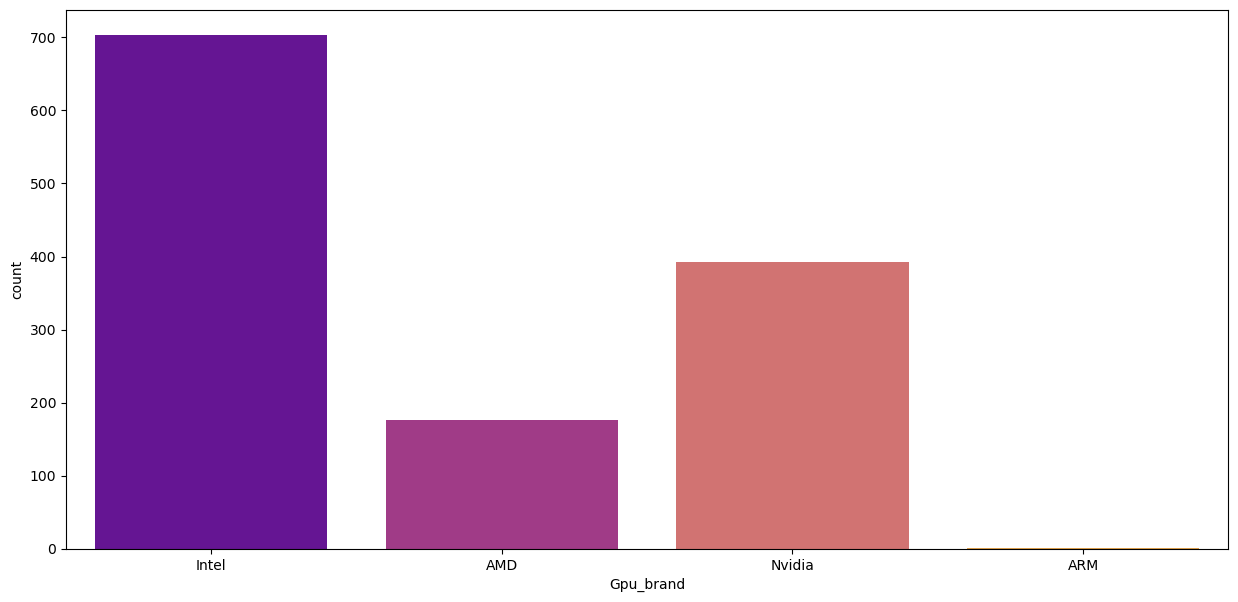

In [213]:

# Which brand GPU is in laptop
plt.figure(figsize=(15,7))
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(x=data['Gpu_brand'],palette='plasma')
plt.show()

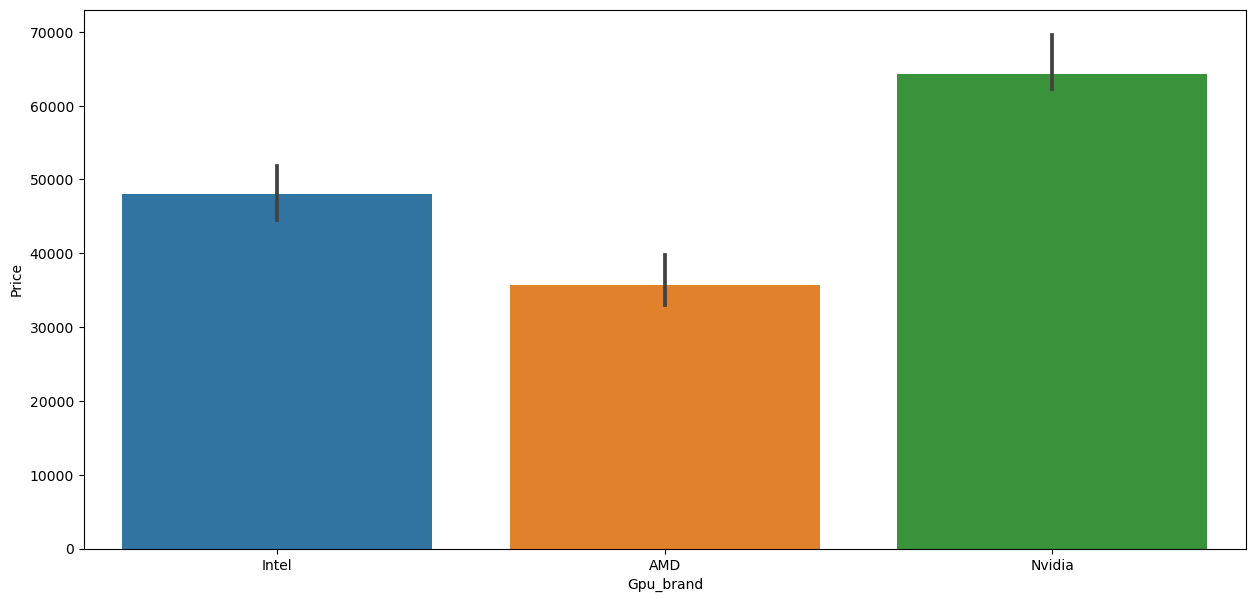

In [214]:
data= data[data['Gpu_brand']!='ARM']
plt.figure(figsize=(15,7))
sns.barplot(x=data['Gpu_brand'],y=data['Price'],estimator=np.median)
plt.show()


In [215]:
# Thankfully, this data doesn't make me go crazy. Next we can safely drop the old GPU column

data = data.drop(columns=['Gpu'])
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel


In [216]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

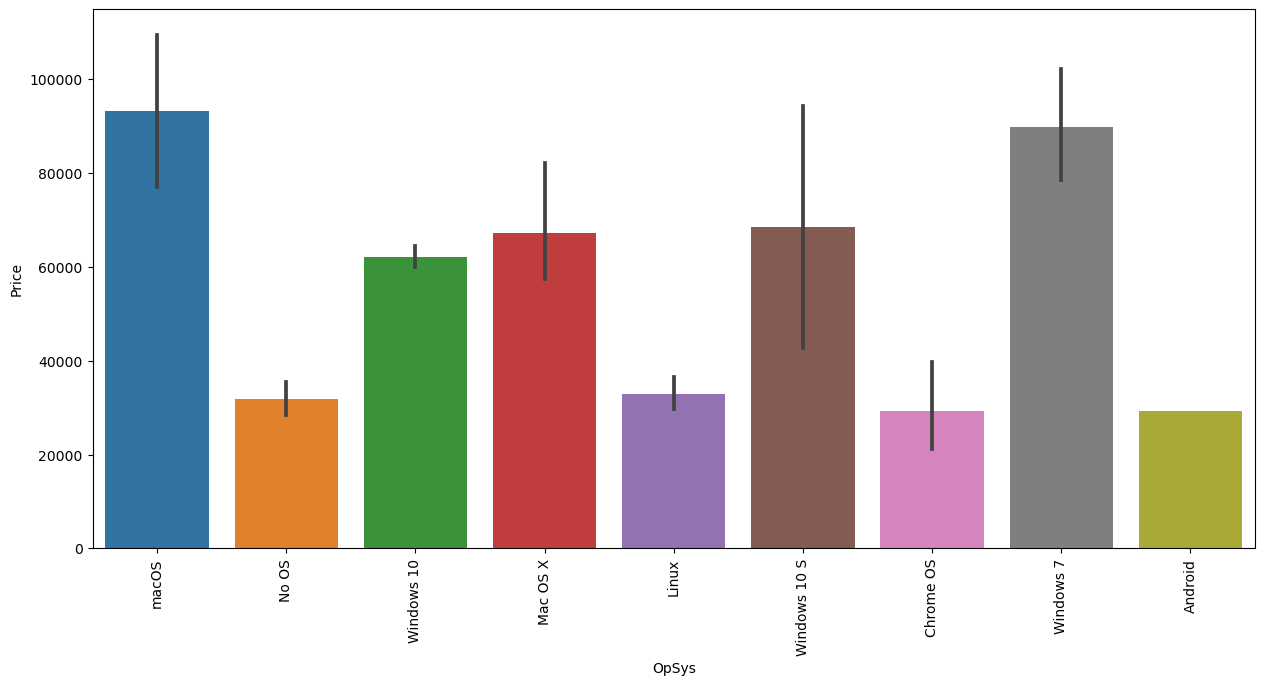

In [217]:
# Barplot - Price variation on OS in laptops
plt.figure(figsize=(15,7))
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()


In [218]:
def OS_category(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    else:
        return 'Other'
    
data['OpSys'] = data['OpSys'].apply(lambda x:OS_category(x))
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel


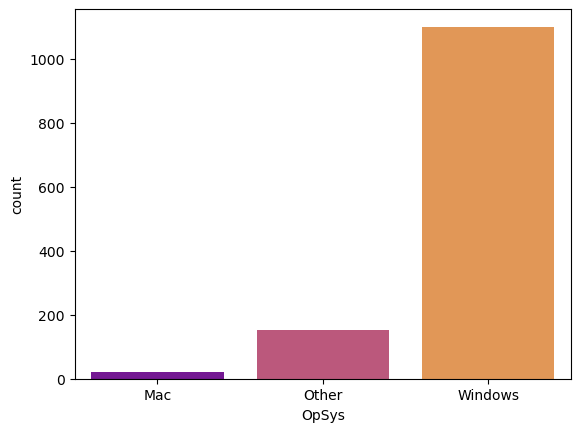

In [219]:

sns.countplot(x=data['OpSys'],palette='plasma')
plt.show()

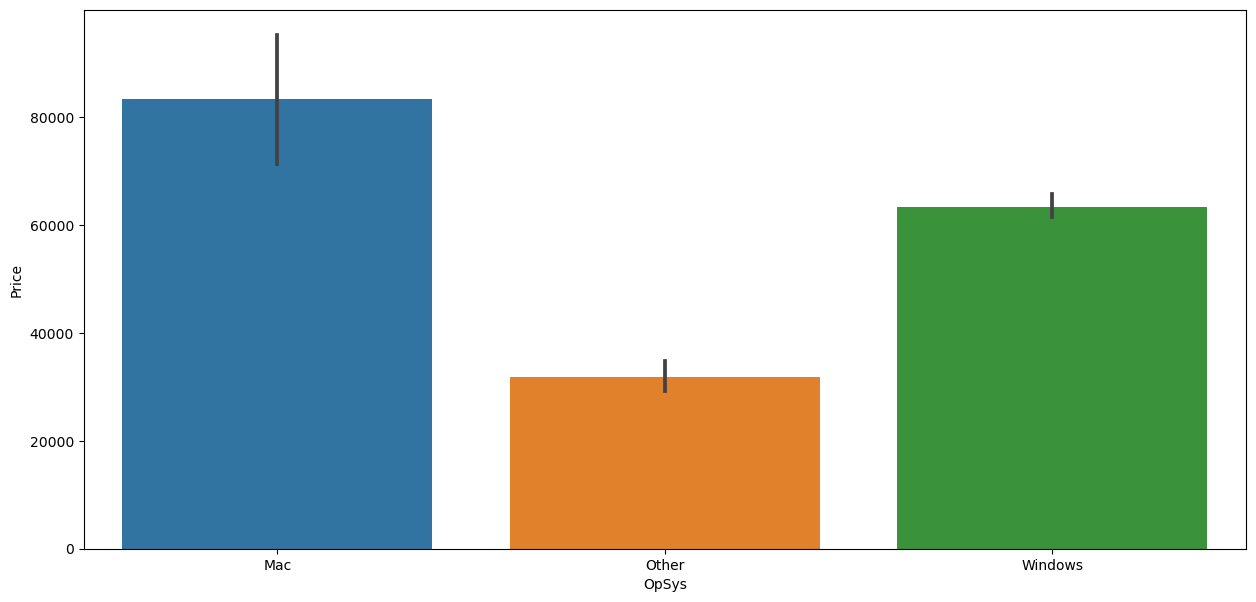

In [220]:
# Barplot - Price variation on OS types
plt.figure(figsize=(15,7))
sns.barplot(x = data['OpSys'],y = data['Price'])
plt.show()

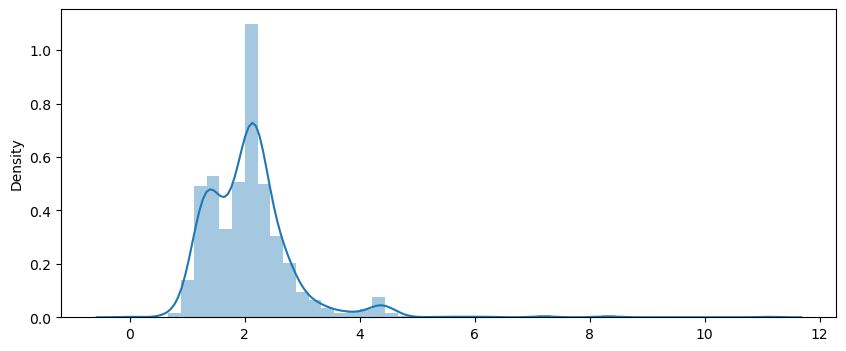

In [221]:
# Weight analysis
# Distribution plot on weight column

plt.figure(figsize=(10,4))
sns.distplot(x=data['Weight'])
plt.show()

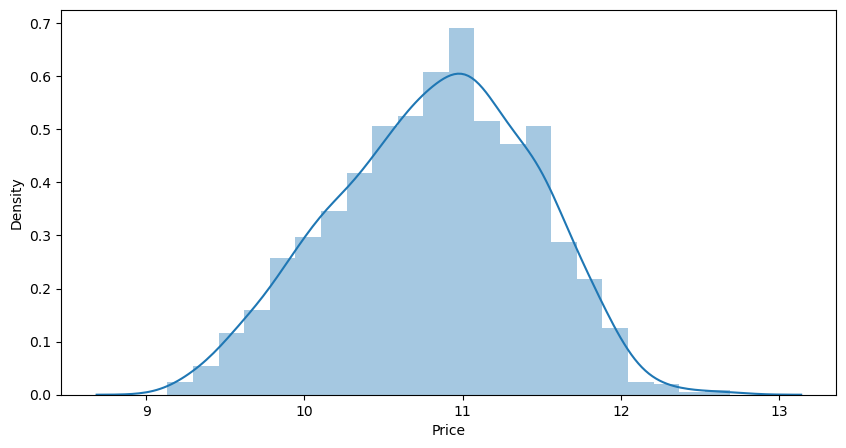

In [222]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(data['Price']))
plt.show()


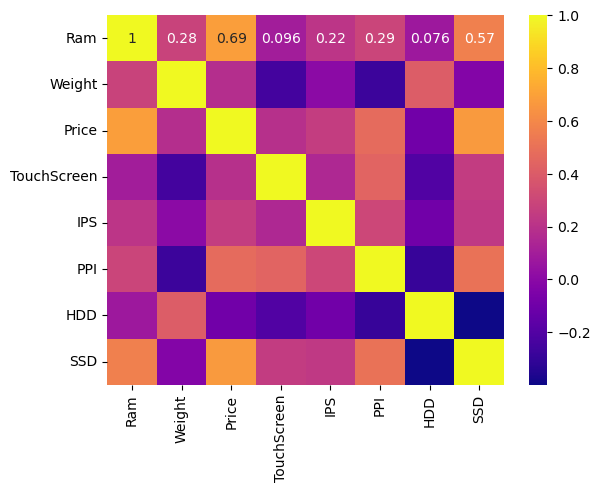

In [223]:
# Heatmap - Correlation for each features
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='plasma')
plt.show()


In [224]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
from sklearn.model_selection import RepeatedKFold

In [225]:
Y = np.log(data['Price'])
X = data.drop(columns=['Price'],axis=1)


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=45)
X_train.shape,X_test.shape

((954, 12), (318, 12))

In [226]:
# Linear Regression 
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2 = LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8225518827135502
MAE 0.19886274333409756


In [227]:
# RandomForestRegressor

step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8851805886247612
MAE 0.1575172136358098


In [228]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=100)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8805507995753741
MAE 0.16403011656316727
